## data preprocess


In [689]:
import numpy as np
import pandas as pd

In [690]:
# load data
data = {}
file_name = ['202212', '202301', '202302']

for f in file_name:
  data[f] = pd.read_excel("/content/drive/MyDrive/Project/cqu_ds_exp/data/"+f+".xlsx"); # dataframe

In [691]:
# delete invalid column
def delete_invalid_column(invalid_cols, data):
  for invalid_col in invalid_cols:
    if invalid_col in data:
      data.drop([invalid_col], axis=1, inplace=True)

del_col = ['序号', '是否离线', '设备状态']
for f in file_name:
  delete_invalid_column(del_col, data[f])

In [692]:
# caculate the numeber of empty row
empty_rows_number = 0
def cal_empty_row_num(data):
  empty_rows = data[data.isna().all(axis=1)]
  return len(empty_rows)

for f in file_name:
  empty_rows_number += cal_empty_row_num(data[f])

print(empty_rows_number)

259


In [693]:
# delete empty row
for f in file_name:
  data[f] = data[f].dropna(how='all')

In [694]:
# caculate the number of row that has empty value
total_empty_val_row_num = 0
def cal_empty_val_row(data):
  return data.isna().any(axis=1).sum()

for f in file_name:
  total_empty_val_row_num += cal_empty_val_row(data[f])

print(total_empty_val_row_num)

71


In [695]:
# delete rows that hav empty value
for f in file_name:
  data[f] = data[f].dropna()

In [696]:
# concat
total_data = pd.concat([data[f] for f in file_name], axis=0)

In [697]:
print(total_data.dtypes)

所属杆塔       object
测量时间       object
气温        float64
空气湿度      float64
风速        float64
风向        float64
气压        float64
降雨量       float64
覆冰厚度      float64
覆冰占比      float64
拉力值       float64
辐射        float64
覆冰告警等级    float64
预警等级       object
dtype: object


In [698]:
# data type trans
total_data['测量时间'] = pd.to_datetime(total_data['测量时间'])
total_data['所属杆塔'] = total_data['所属杆塔'].astype(str)
total_data['预警等级'] = total_data['预警等级'].astype(str)
total_data['覆冰告警等级'] = total_data['覆冰告警等级'].astype(int)
print(total_data.dtypes)

所属杆塔              object
测量时间      datetime64[ns]
气温               float64
空气湿度             float64
风速               float64
风向               float64
气压               float64
降雨量              float64
覆冰厚度             float64
覆冰占比             float64
拉力值              float64
辐射               float64
覆冰告警等级             int64
预警等级              object
dtype: object


In [699]:
# delete duplicated row
total_data.drop_duplicates(keep='last', inplace=True)

In [700]:
print(total_data['覆冰告警等级'].drop_duplicates())
print(total_data['预警等级'].drop_duplicates())

0      0
1      2
955    4
964    3
730    1
821    6
869    5
Name: 覆冰告警等级, dtype: int64
0        正常
1      橙色预警
267    黄色预警
342    红色预警
Name: 预警等级, dtype: object


In [701]:
# group
data_62 = total_data[total_data['所属杆塔'] == '62#']
data_99 = total_data[total_data['所属杆塔'] == '99#']
print(data_62.shape[0])
print(data_99.shape[0])

1864
2064


In [702]:
# 62# is useless for prediction
print(data_62['预警等级'].drop_duplicates())
print(data_62['覆冰告警等级'].drop_duplicates())
print(data_99['预警等级'].drop_duplicates())
print(data_99['覆冰告警等级'].drop_duplicates())

0    正常
Name: 预警等级, dtype: object
0    0
Name: 覆冰告警等级, dtype: int64
1      橙色预警
2        正常
267    黄色预警
342    红色预警
Name: 预警等级, dtype: object
1      2
2      0
955    4
964    3
730    1
821    6
869    5
Name: 覆冰告警等级, dtype: int64


In [703]:
def warning_level_label_func(x):
  if x == '正常':
    return '0'
  elif x == '橙色预警':
    return '1'
  elif x == '黄色预警':
    return '2'
  elif x == '红色预警':
    return '3'
  else:
    print("预警等级错误")
    return

data_62['预警等级'] = data_62['预警等级'].map(warning_level_label_func)
data_62['预警等级'] = data_62['预警等级'].astype(int)
data_99['预警等级'] = data_99['预警等级'].map(warning_level_label_func)
data_99['预警等级'] = data_99['预警等级'].astype(int)
print(data_99['预警等级'].drop_duplicates())

1      1
2      0
267    2
342    3
Name: 预警等级, dtype: int64


In [704]:
def monitor_label_func(x):
  if x == '62#':
    return 0
  elif x == '99#':
    return 1
  else:
    print("所属杆塔错误")
    return

data_62['所属杆塔'] = data_62['所属杆塔'].map(monitor_label_func)
data_99['所属杆塔'] = data_99['所属杆塔'].map(monitor_label_func)
data_99.dtypes

所属杆塔               int64
测量时间      datetime64[ns]
气温               float64
空气湿度             float64
风速               float64
风向               float64
气压               float64
降雨量              float64
覆冰厚度             float64
覆冰占比             float64
拉力值              float64
辐射               float64
覆冰告警等级             int64
预警等级               int64
dtype: object

In [705]:
data_99_sort_by_time = data_99.sort_values(by='测量时间')
print(data_99_sort_by_time['测量时间'])
print(data_99_sort_by_time)

1348   2022-12-01 02:04:02
1346   2022-12-01 03:06:02
1343   2022-12-01 04:05:02
1342   2022-12-01 04:06:01
1341   2022-12-01 05:04:02
               ...        
9      2023-02-28 21:20:43
5      2023-02-28 22:05:04
4      2023-02-28 22:20:43
1      2023-02-28 23:05:03
0      2023-02-28 23:06:04
Name: 测量时间, Length: 2064, dtype: datetime64[ns]
      所属杆塔                测量时间    气温   空气湿度    风速     风向   气压  降雨量  覆冰厚度  \
1348     1 2022-12-01 02:04:02 -2.27  93.00  0.73   31.0  0.0  0.0   0.0   
1346     1 2022-12-01 03:06:02 -2.24  89.00  0.36   46.0  0.0  0.0   0.0   
1343     1 2022-12-01 04:05:02 -1.21  89.00  0.30  182.0  0.0  0.0   0.0   
1342     1 2022-12-01 04:06:01 -1.19  88.00  2.30  126.0  0.0  0.0   0.0   
1341     1 2022-12-01 05:04:02 -1.19  88.00  2.30  126.0  0.0  0.0   0.0   
...    ...                 ...   ...    ...   ...    ...  ...  ...   ...   
9        1 2023-02-28 21:20:43  1.15  43.07  2.40  141.7  0.0  0.0   0.0   
5        1 2023-02-28 22:05:04  2.83  34.00  0.

## exploratory data analysis

In [706]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator # 设置刻度间隔

In [707]:
zh_to_en = {'气温': 'temp', '空气湿度': 'air_humidity', '风速': 'wind_speed', '风向': 'wind_direction', \
            '气压': 'air_pressure', '降雨量': 'rainfall', '覆冰厚度': 'ice_thickness', '覆冰占比': 'percentage_of_ice_cover', \
            '拉力值': 'tension_value', '辐射': 'radiation'}

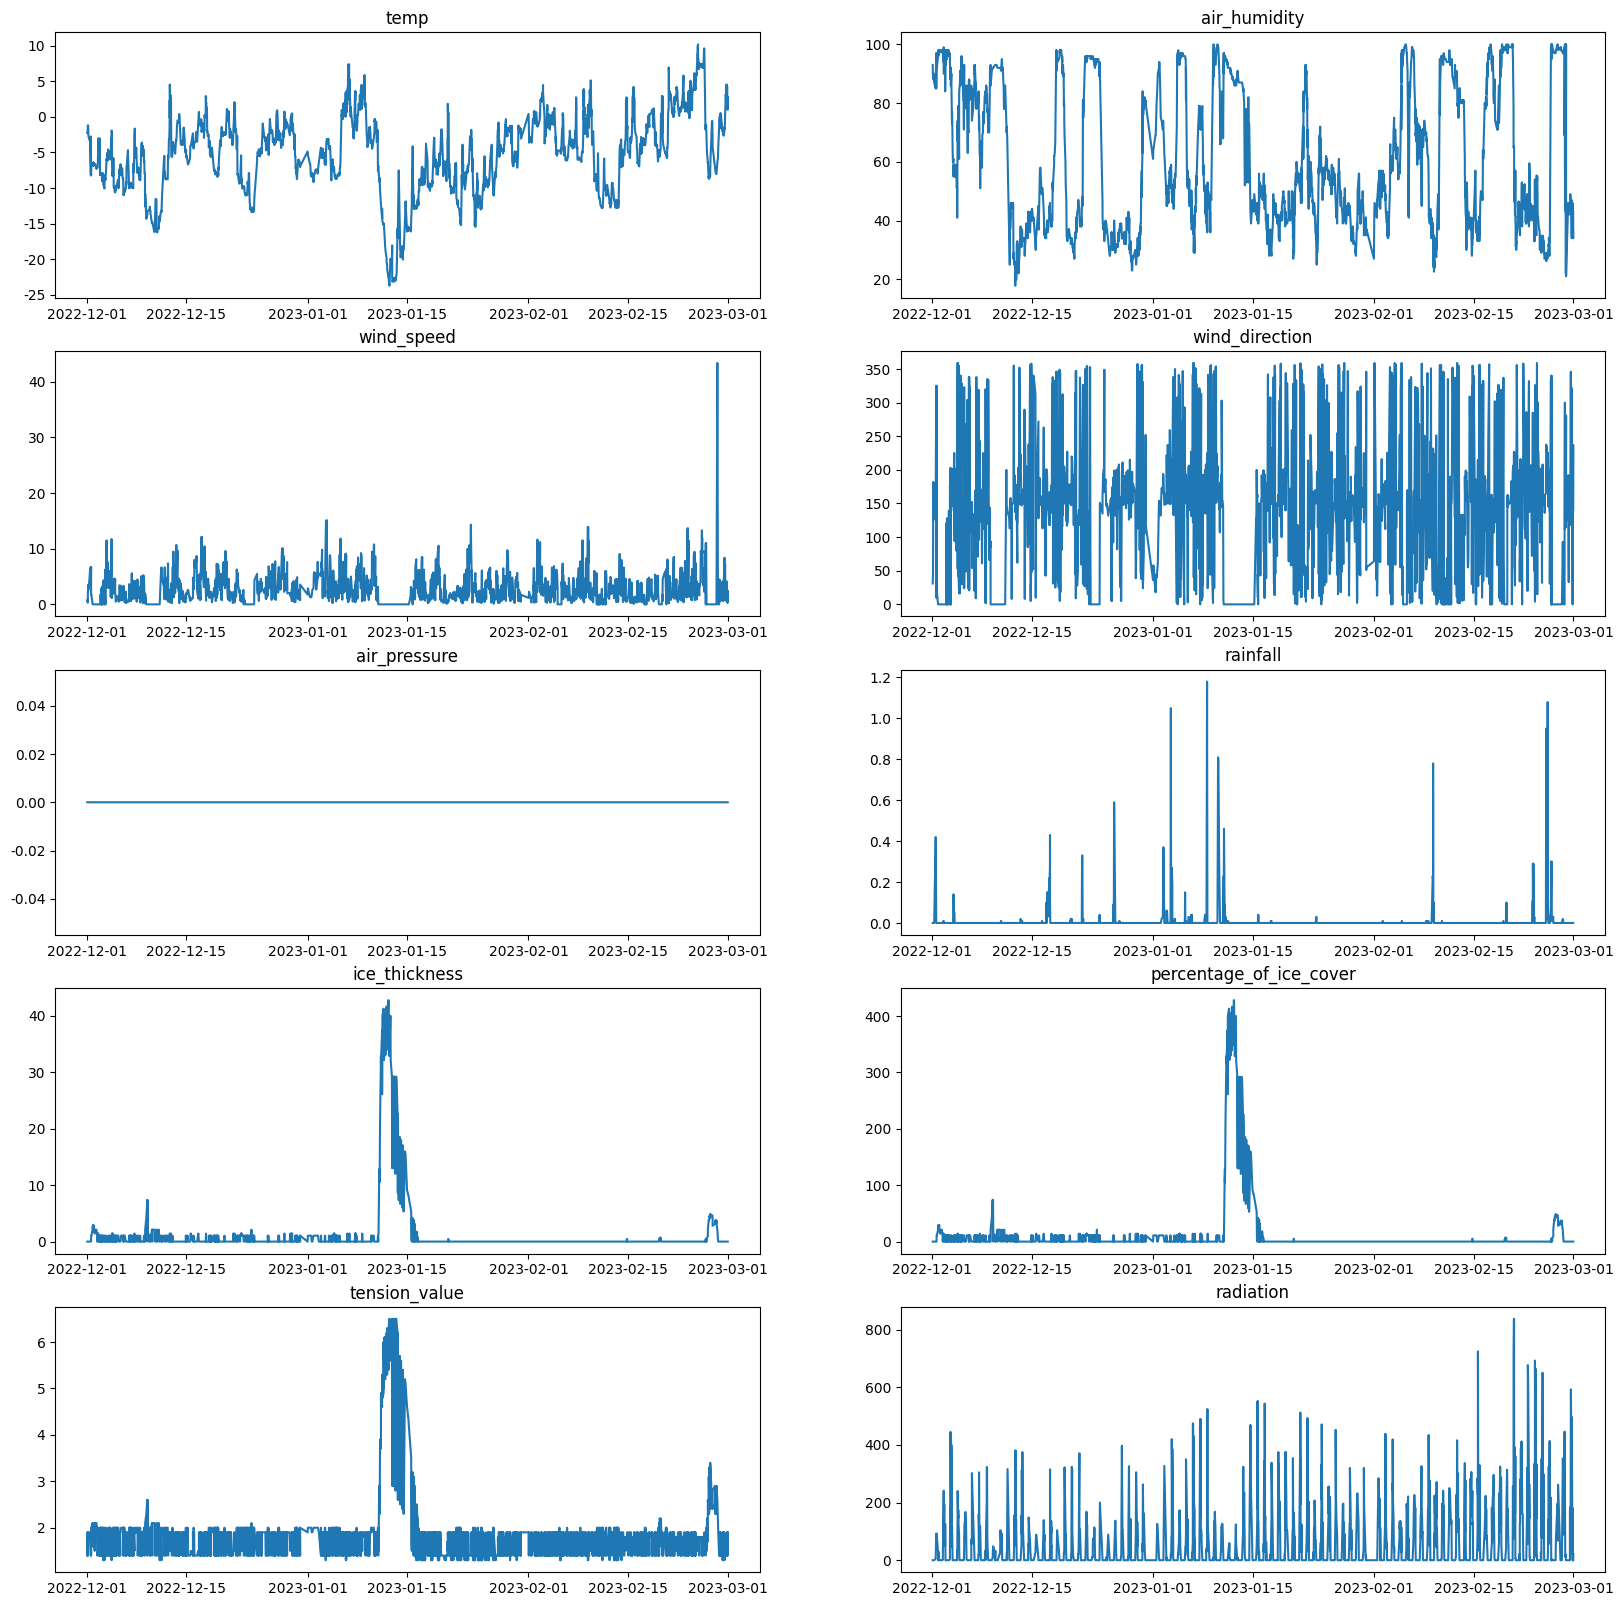

In [708]:
# features change with time
col_id = 2
plt.figure(figsize=(20, 20))
for subplot_id in range(1, 11):
  plt.subplot(5, 2, subplot_id)
  plt.plot(data_99_sort_by_time['测量时间'], data_99_sort_by_time[data_99_sort_by_time.columns.tolist()[col_id]])
  plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]])
  col_id += 1

In [709]:
# delete air_pressure column by the above figure
delete_invalid_column(['气压'], data_99_sort_by_time)
data_99_sort_by_time.dtypes

所属杆塔               int64
测量时间      datetime64[ns]
气温               float64
空气湿度             float64
风速               float64
风向               float64
降雨量              float64
覆冰厚度             float64
覆冰占比             float64
拉力值              float64
辐射               float64
覆冰告警等级             int64
预警等级               int64
dtype: object

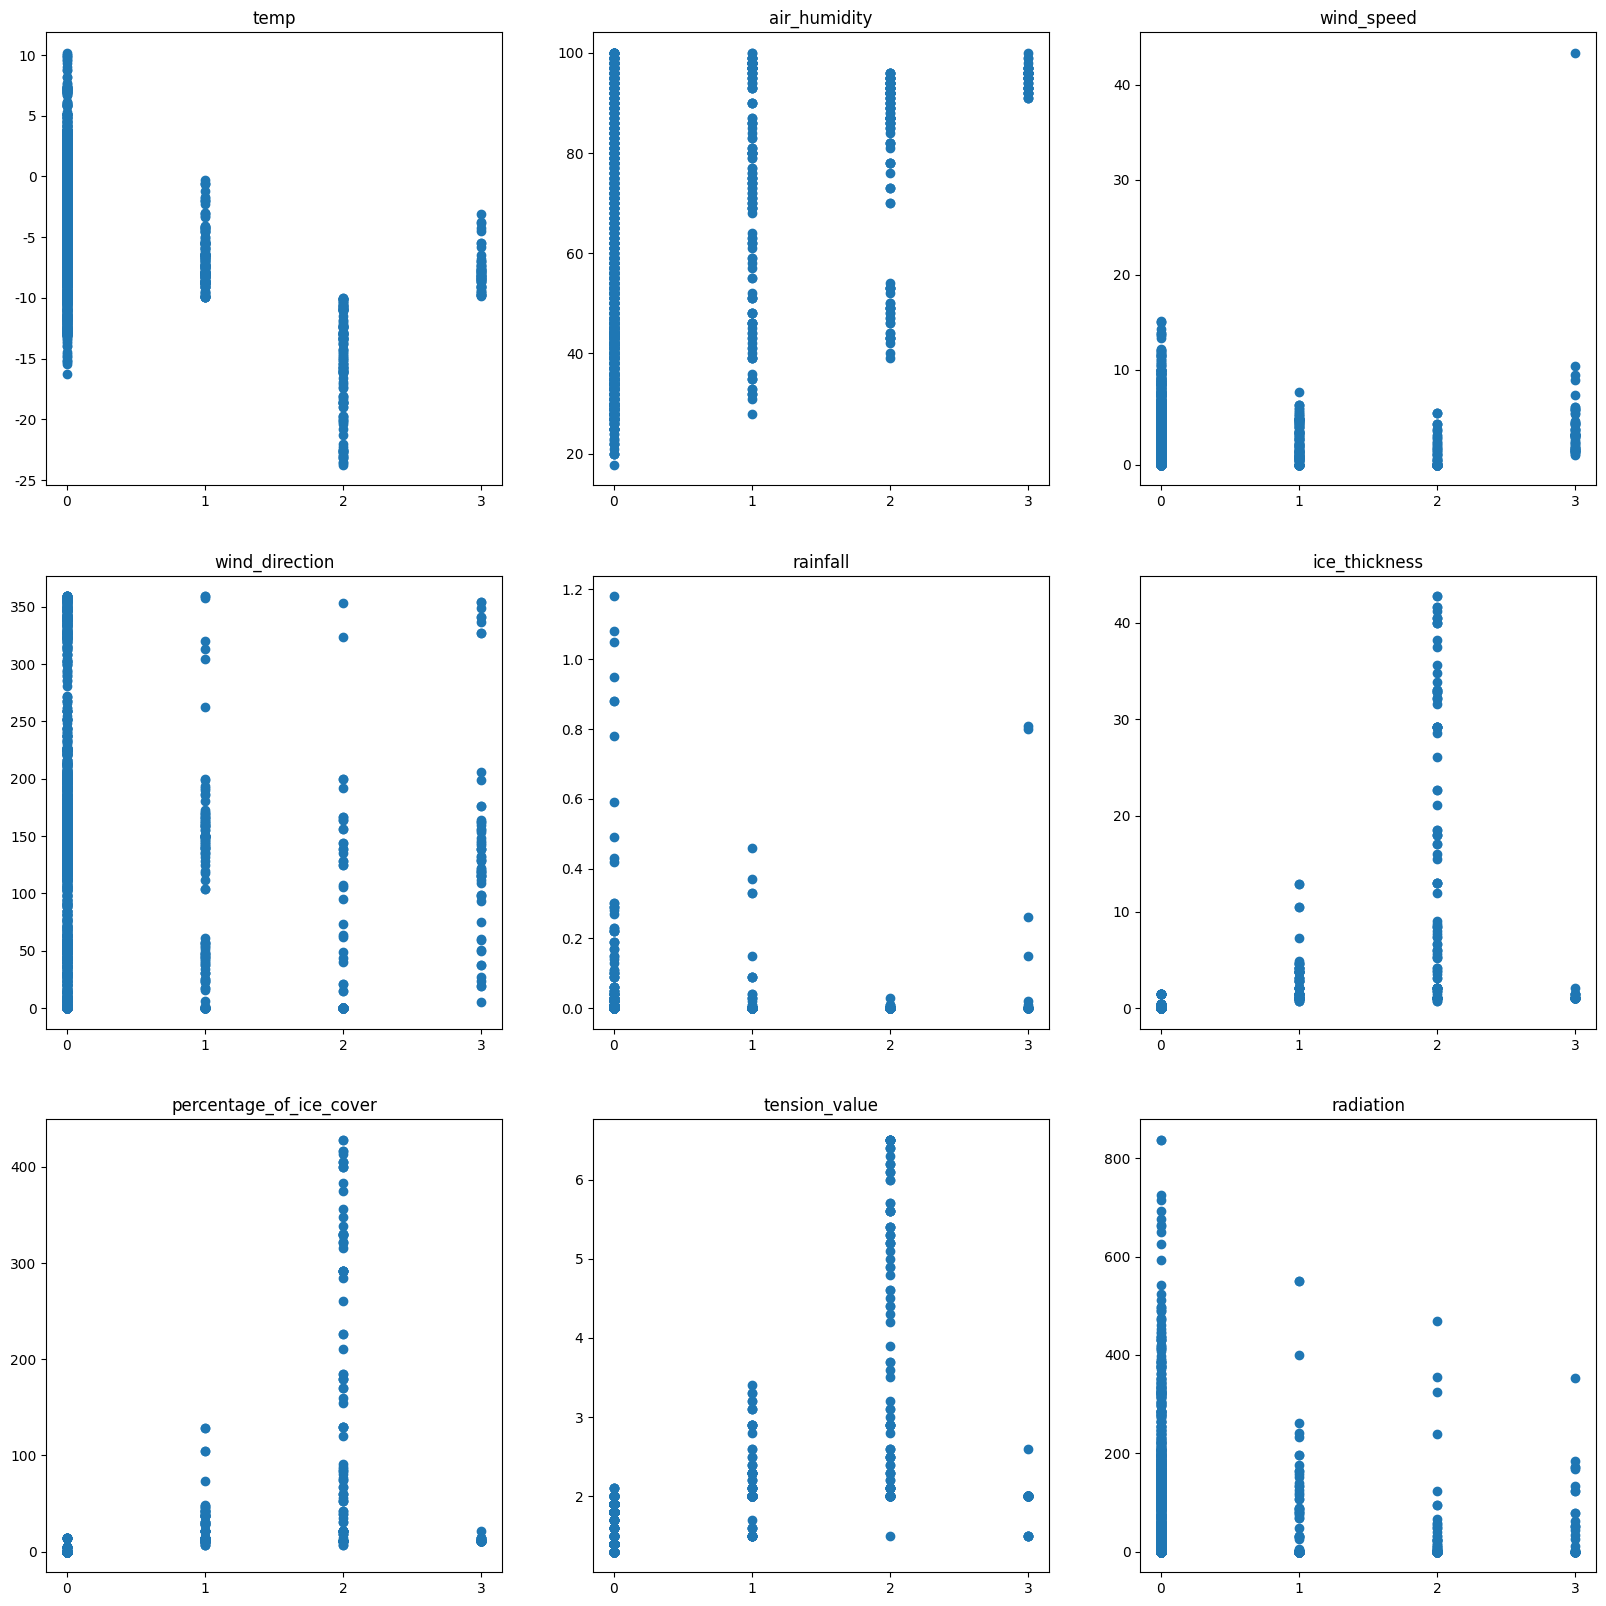

In [710]:
# impact of single feature on warning levels
col_id = 2
plt.figure(figsize=(20, 20))
for subplot_id in range(1, 10):
  plt.subplot(3, 3, subplot_id)
  plt.scatter(data_99_sort_by_time['预警等级'], data_99_sort_by_time[data_99_sort_by_time.columns.tolist()[col_id]])
  plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]])

  # set the x-axis interval
  x_major_locator=MultipleLocator(1)
  ax=plt.gca()
  ax.xaxis.set_major_locator(x_major_locator)

  col_id += 1

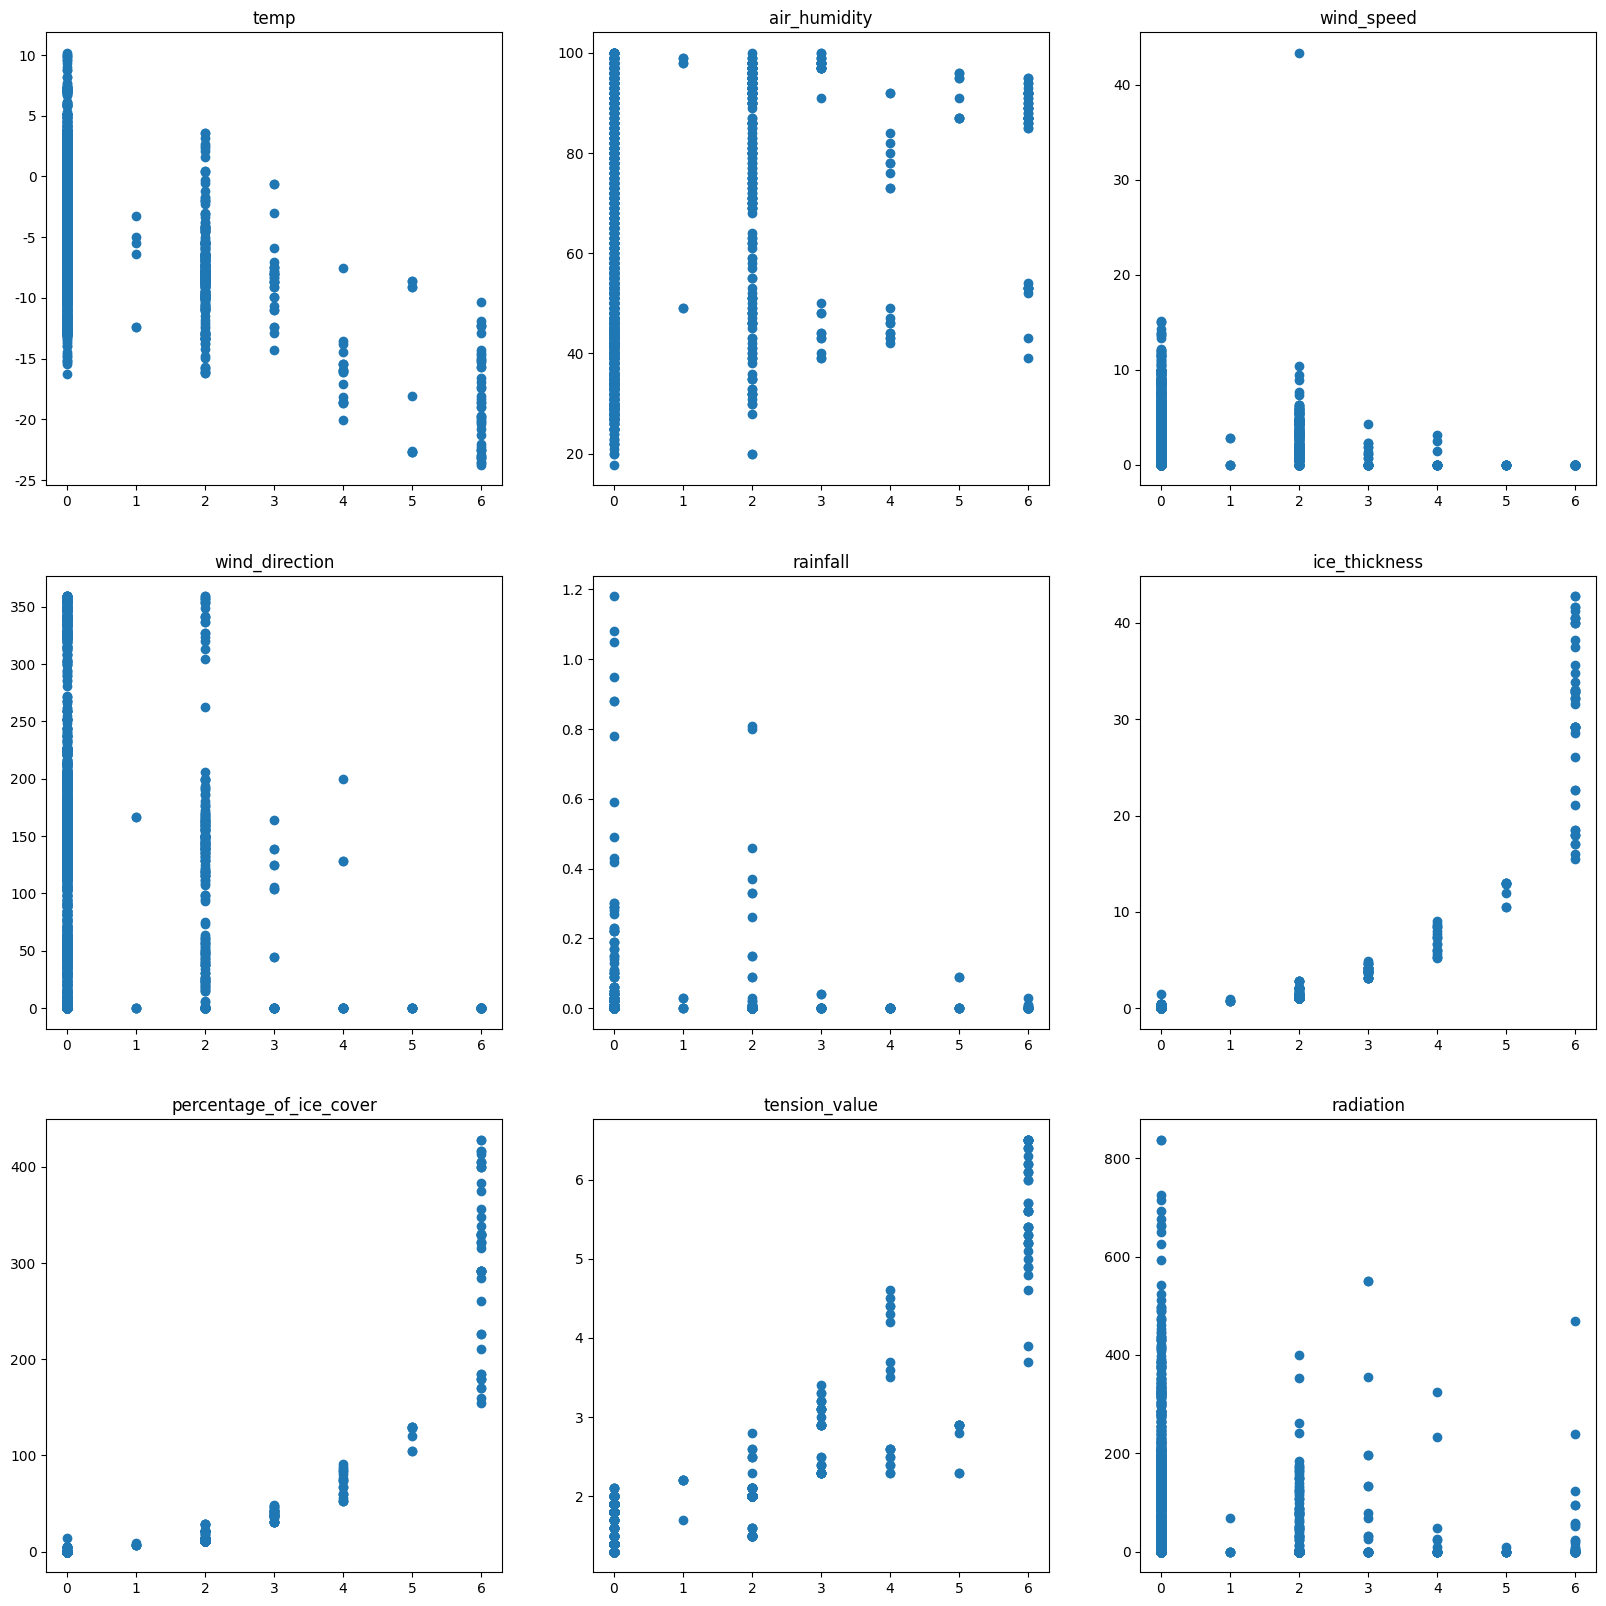

In [711]:
# impact of a single feature on ice cover alarm levels
col_id = 2
plt.figure(figsize=(20, 20))
for subplot_id in range(1, 10):
  plt.subplot(3, 3, subplot_id)
  plt.scatter(data_99_sort_by_time['覆冰告警等级'], data_99_sort_by_time[data_99_sort_by_time.columns.tolist()[col_id]])
  plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]])
  col_id += 1

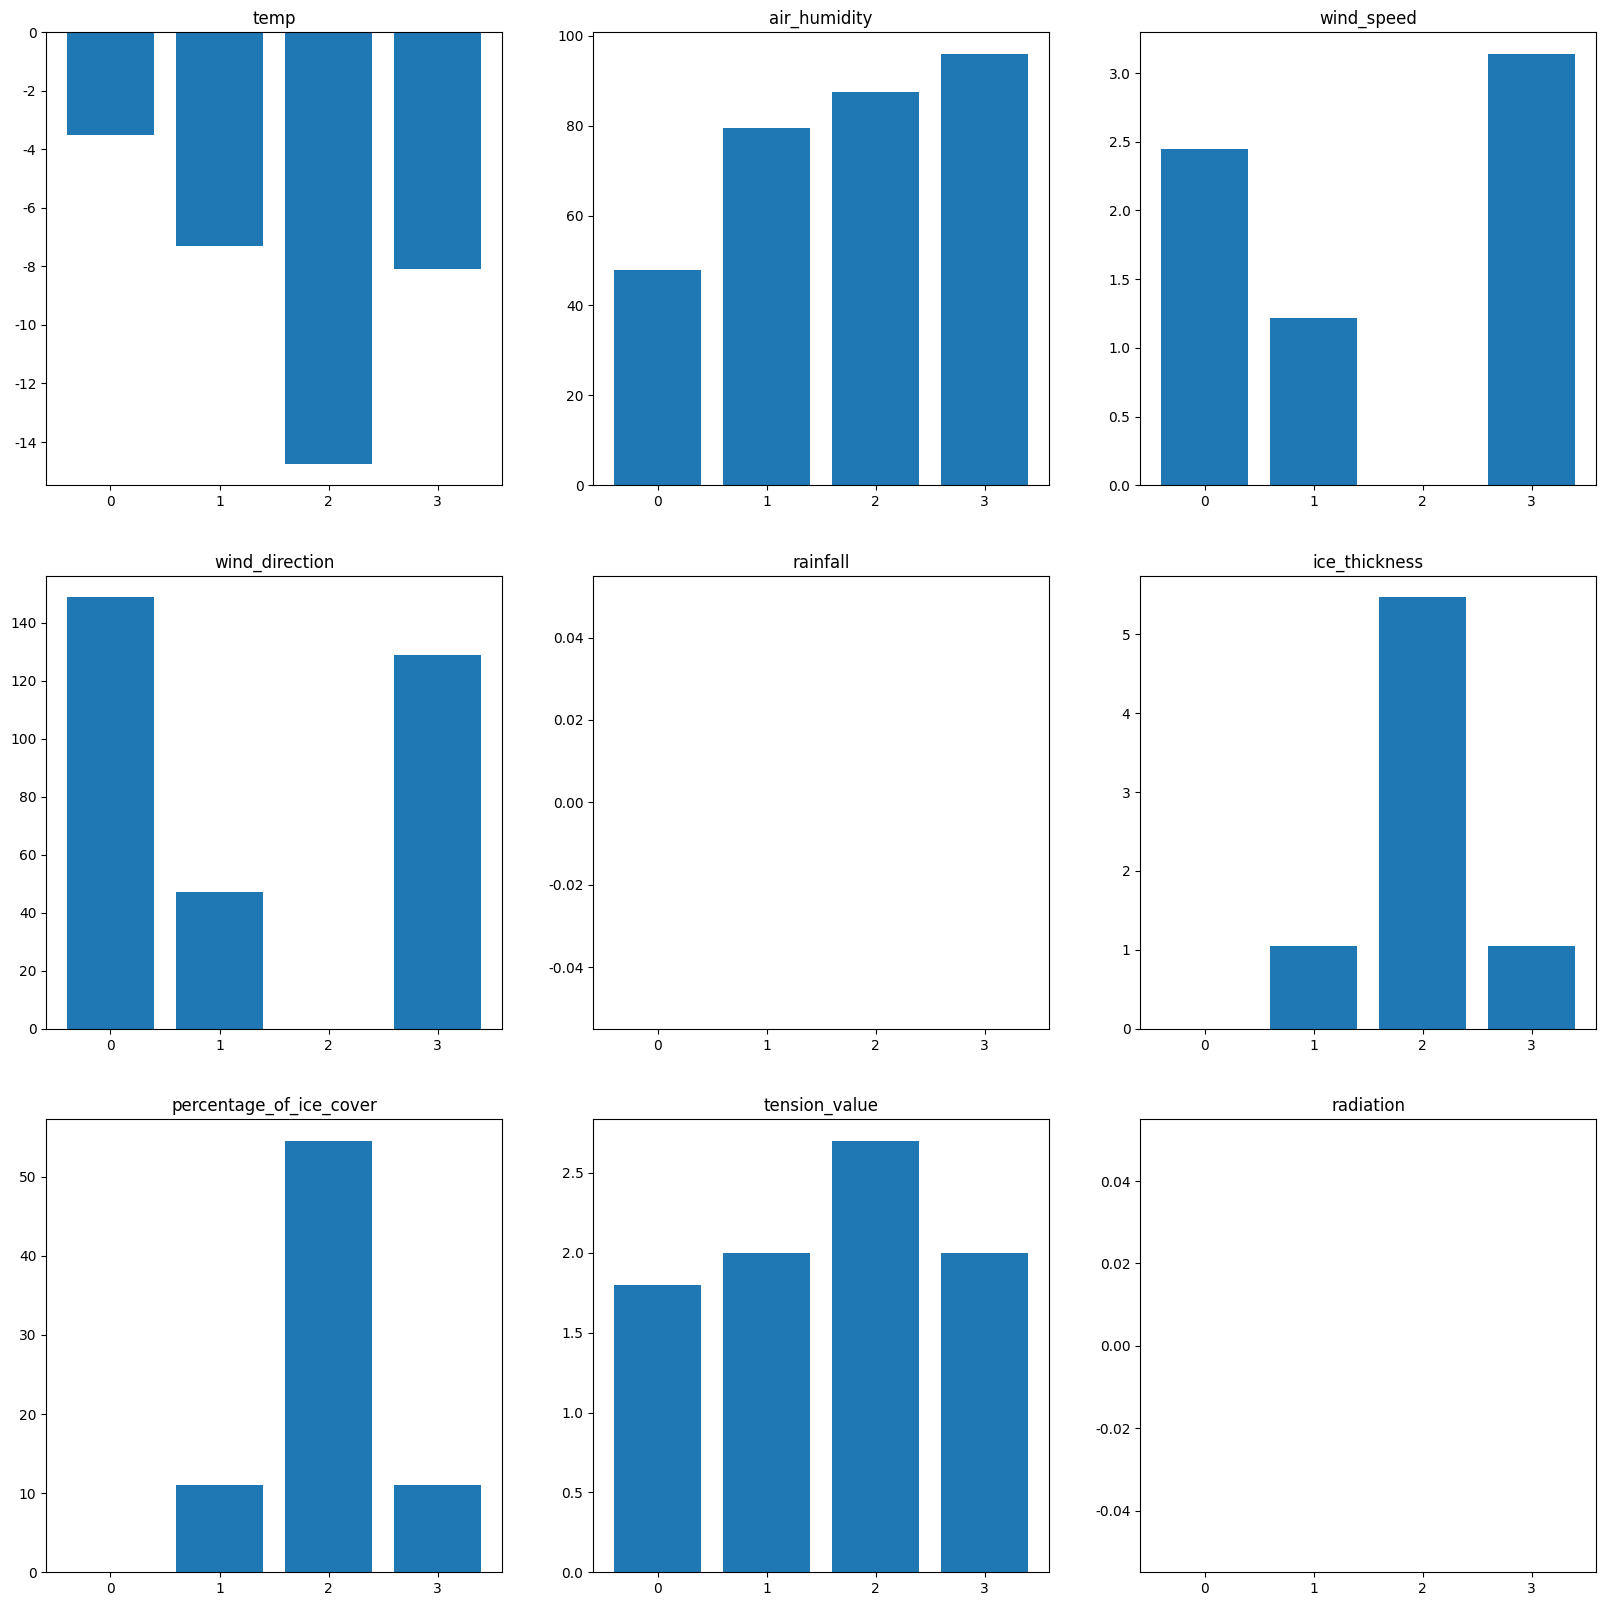

In [712]:
# impact of single feature on warning levels
col_id = 2
plt.figure(figsize=(20, 20))
for subplot_id in range(1, 10):
  plt.subplot(3, 3, subplot_id)
  medians = []
  for warning_level in range(0, 4):
    medians.append(data_99_sort_by_time[data_99_sort_by_time['预警等级'] == warning_level][data_99_sort_by_time.columns.tolist()[col_id]].median())
  plt.bar(range(0, 4), medians)

  # set the x-axis interval
  x_major_locator=MultipleLocator(1)
  ax=plt.gca()
  ax.xaxis.set_major_locator(x_major_locator)

  plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]])
  col_id += 1

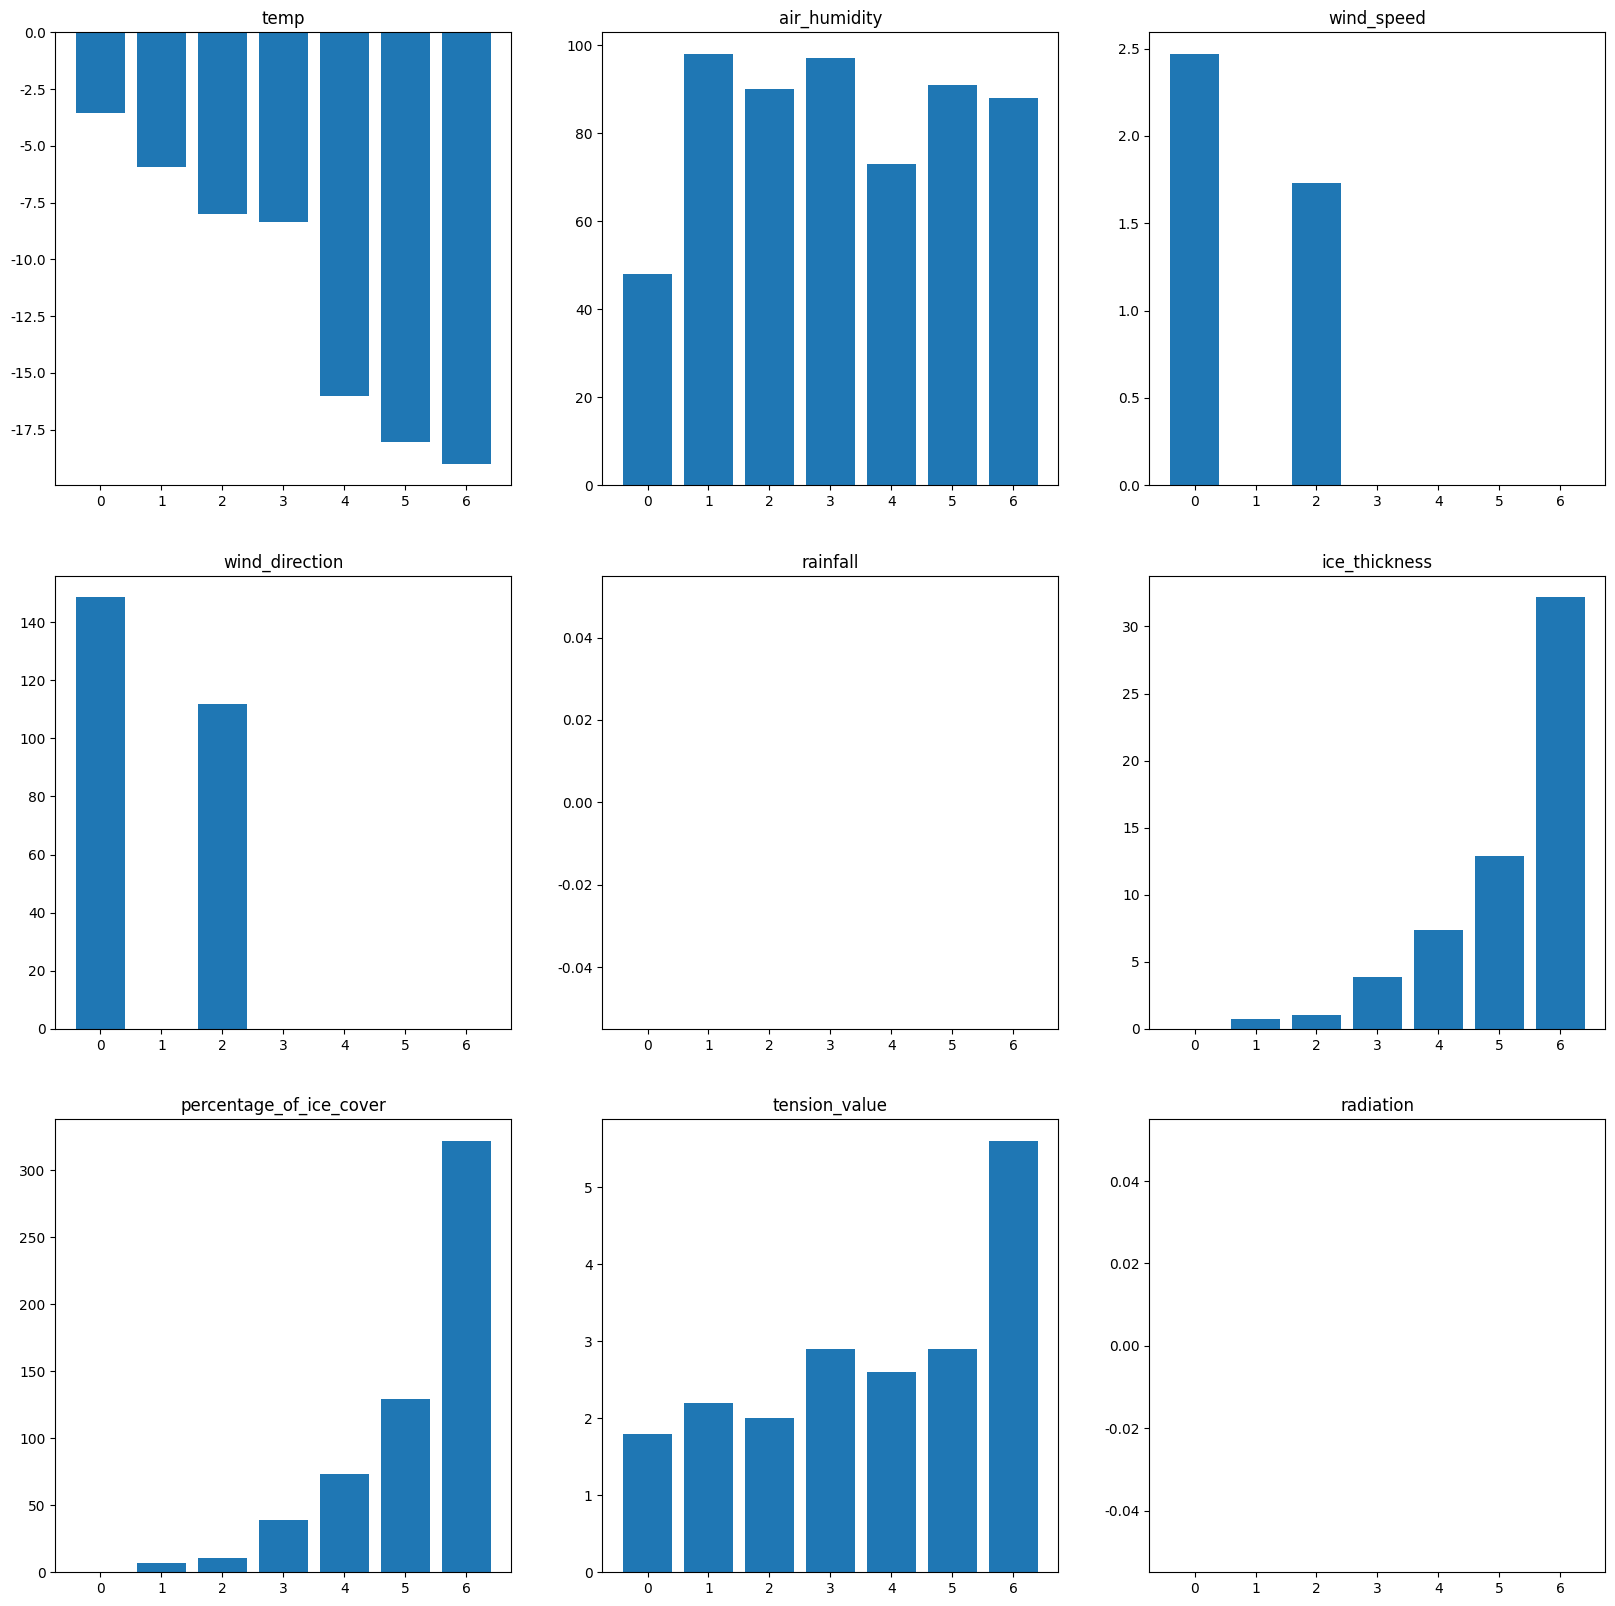

In [713]:
# impact of a single feature on ice cover alarm levels
col_id = 2
plt.figure(figsize=(20, 20))
for subplot_id in range(1, 10):
  plt.subplot(3, 3, subplot_id)
  medians = []
  for warning_level in range(0, 7):
    medians.append(data_99_sort_by_time[data_99_sort_by_time['覆冰告警等级'] == warning_level][data_99_sort_by_time.columns.tolist()[col_id]].median())
  plt.bar(range(0, 7), medians)

  # set the x-axis interval
  x_major_locator=MultipleLocator(1)
  ax=plt.gca()
  ax.xaxis.set_major_locator(x_major_locator)

  plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]])
  col_id += 1

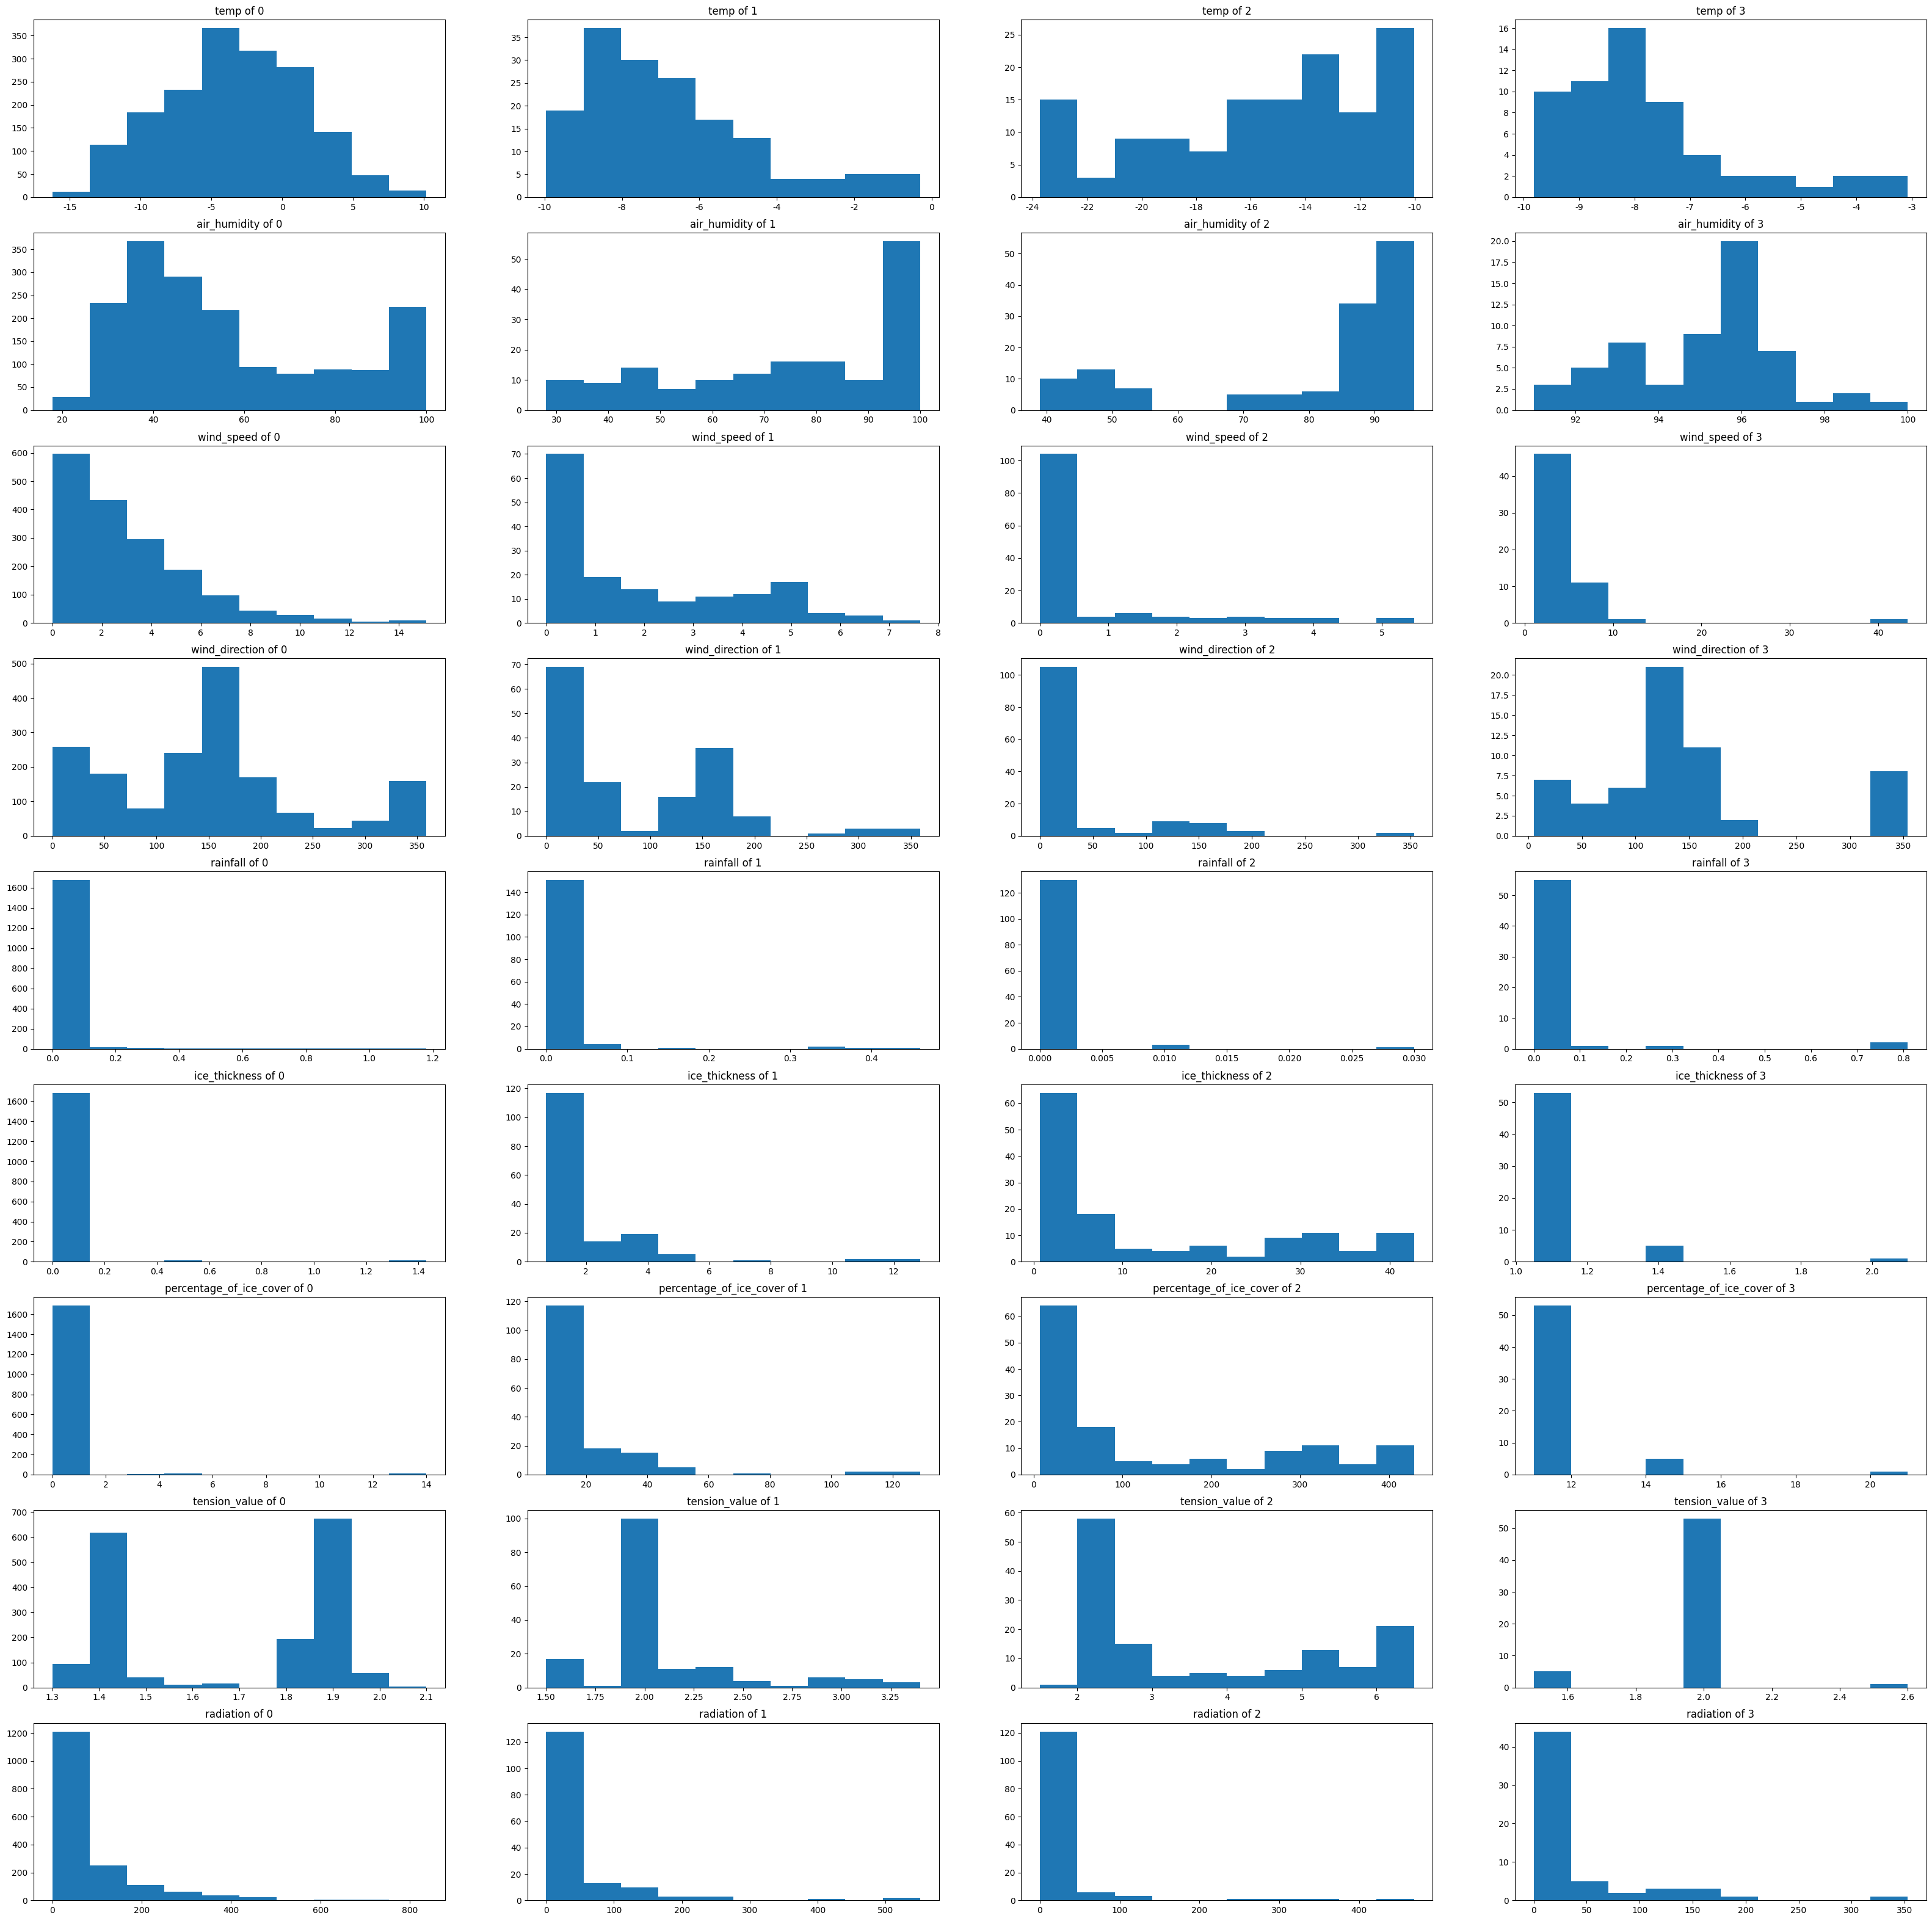

In [714]:
# distribution of features of different warning levels
col_id = 2
subplot_id = 1
plt.figure(figsize=(40, 40))
while subplot_id < 37:
  for warning_level in range(0, 4):
    plt.subplot(9, 4, subplot_id)
    plt.hist(data_99_sort_by_time[data_99_sort_by_time['预警等级'] == warning_level][data_99_sort_by_time.columns.tolist()[col_id]])
    plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]]+" of "+str(warning_level))
    subplot_id += 1
  col_id += 1

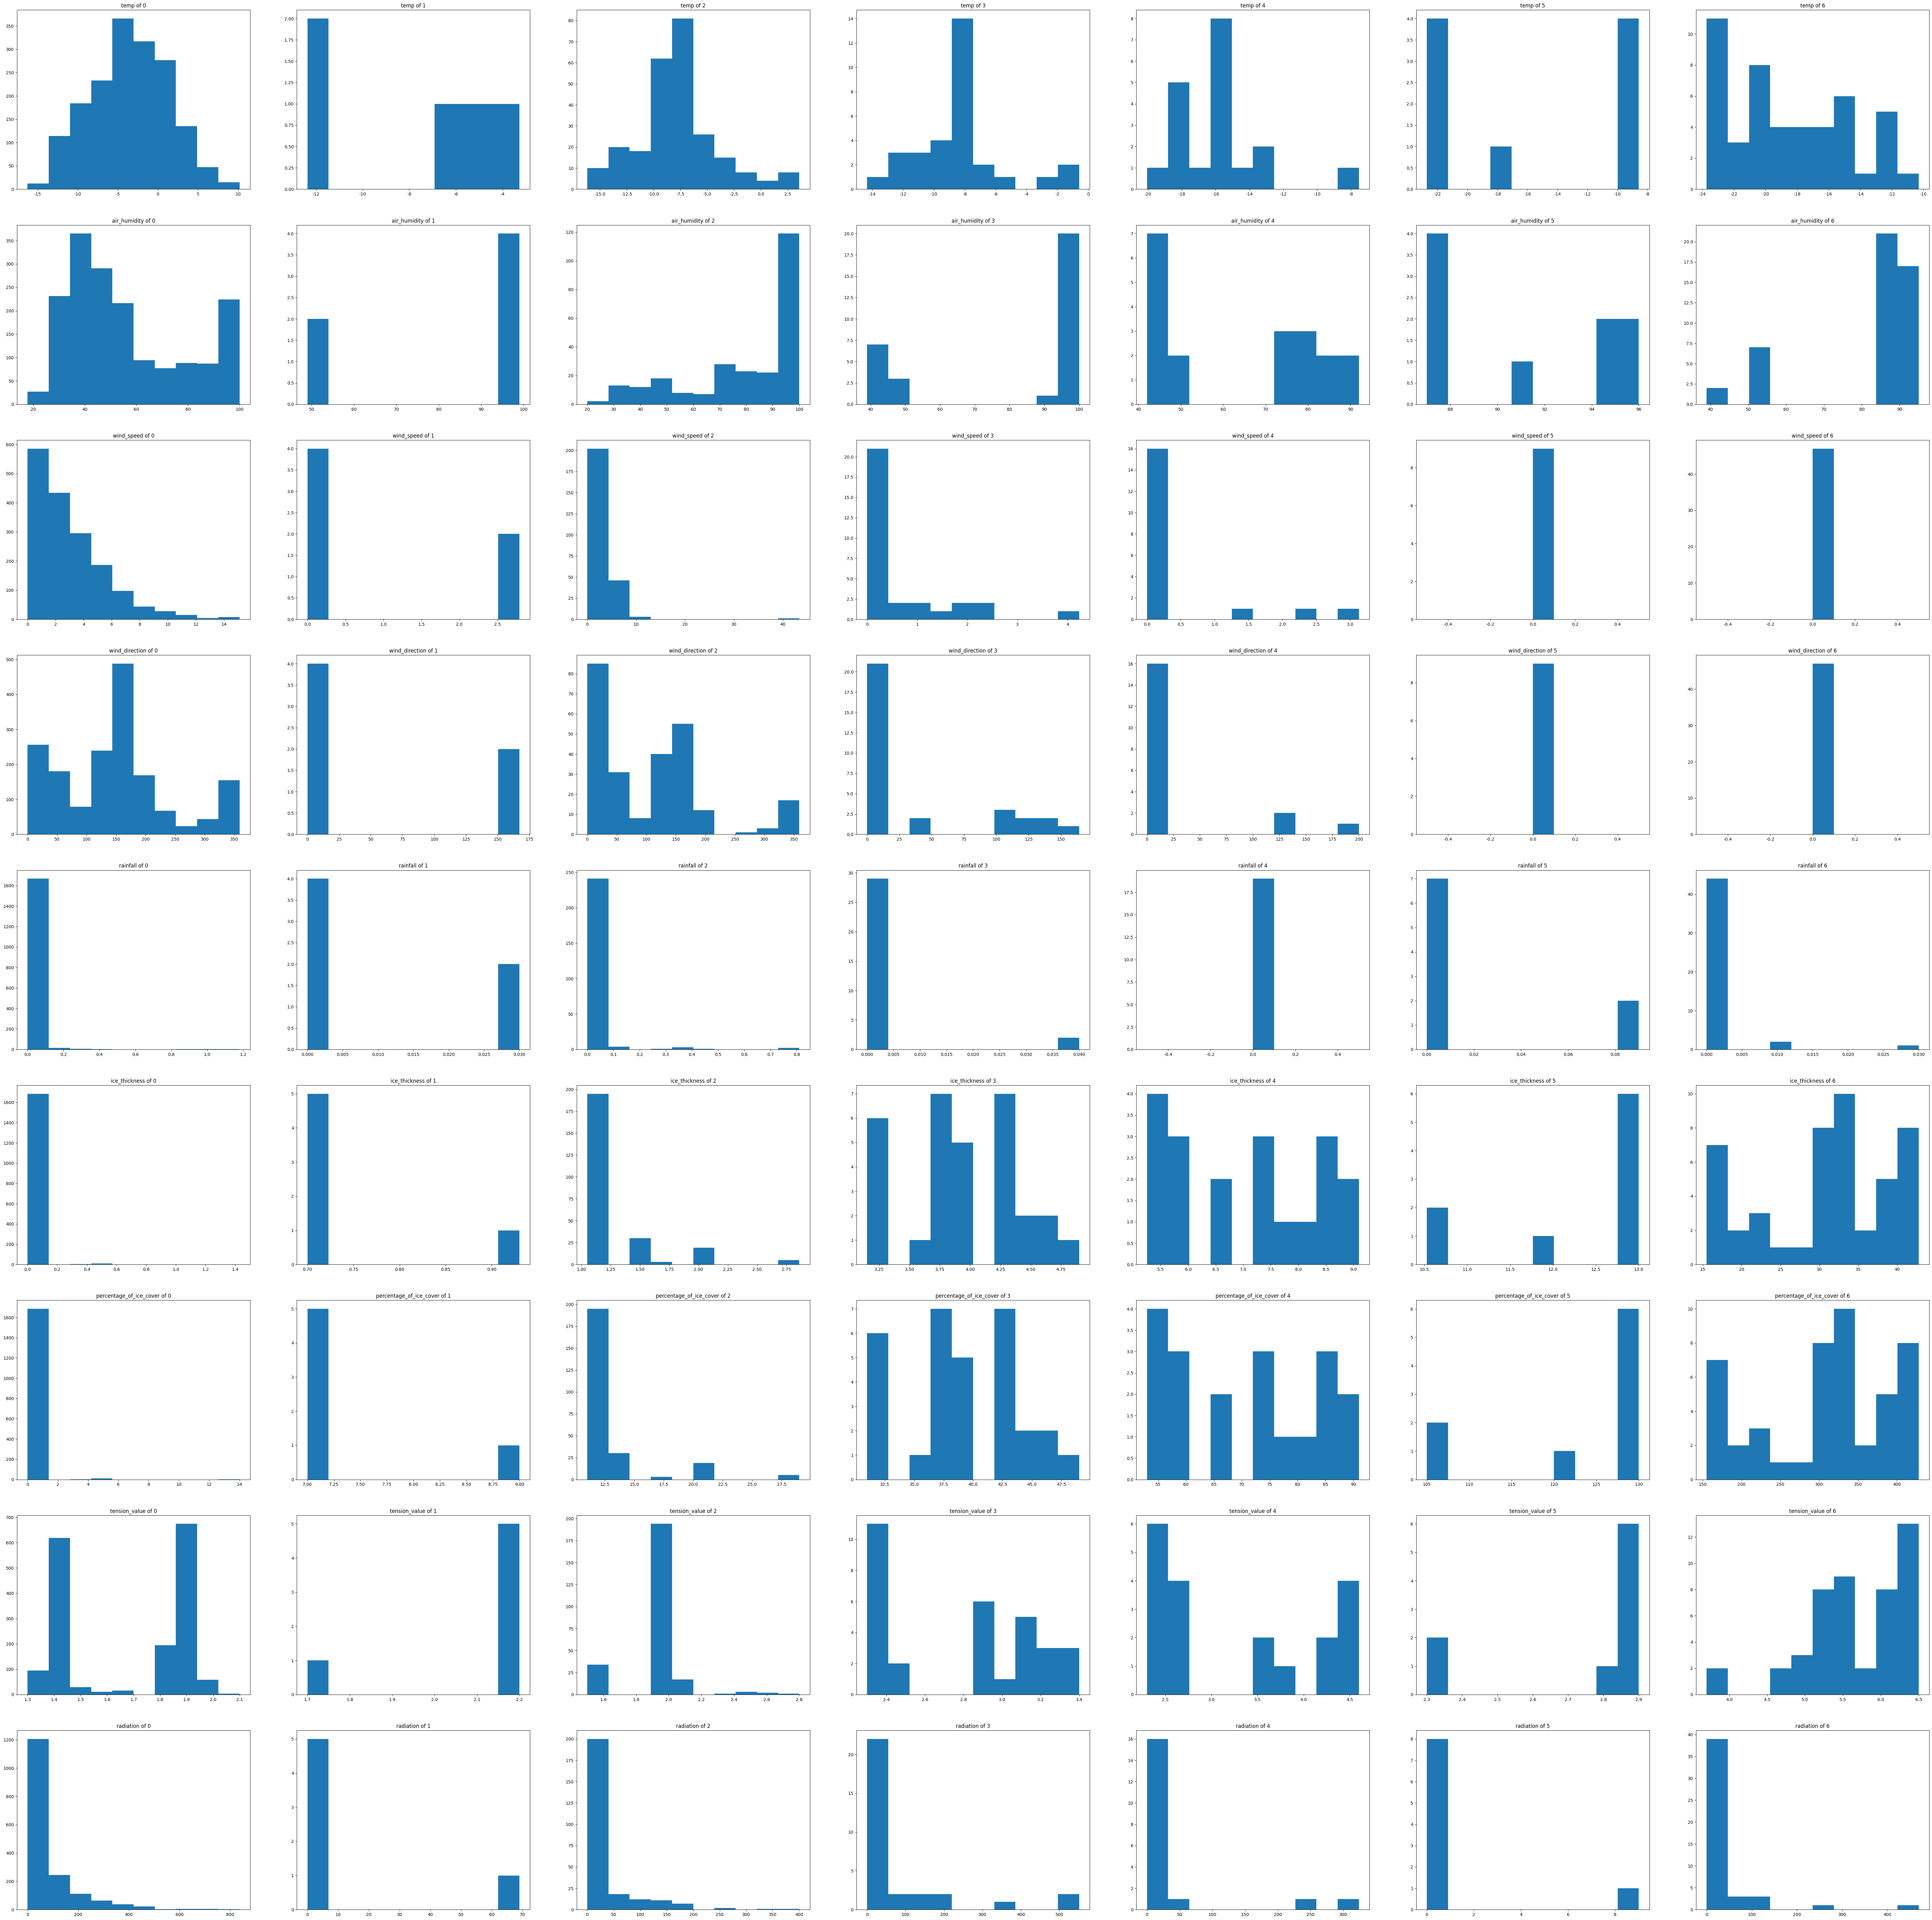

In [715]:
# distribution of features of different ice cover alarm levels
col_id = 2
subplot_id = 1
plt.figure(figsize=(80, 80))
while subplot_id < 64:
  for warning_level in range(0, 7):
    plt.subplot(9, 7, subplot_id)
    plt.hist(data_99_sort_by_time[data_99_sort_by_time['覆冰告警等级'] == warning_level][data_99_sort_by_time.columns.tolist()[col_id]])
    plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]]+" of "+str(warning_level))
    subplot_id += 1
  col_id += 1

In [716]:
delete_invalid_column(['气压'], data_62)
data_62.dtypes

所属杆塔               int64
测量时间      datetime64[ns]
气温               float64
空气湿度             float64
风速               float64
风向               float64
降雨量              float64
覆冰厚度             float64
覆冰占比             float64
拉力值              float64
辐射               float64
覆冰告警等级             int64
预警等级               int64
dtype: object

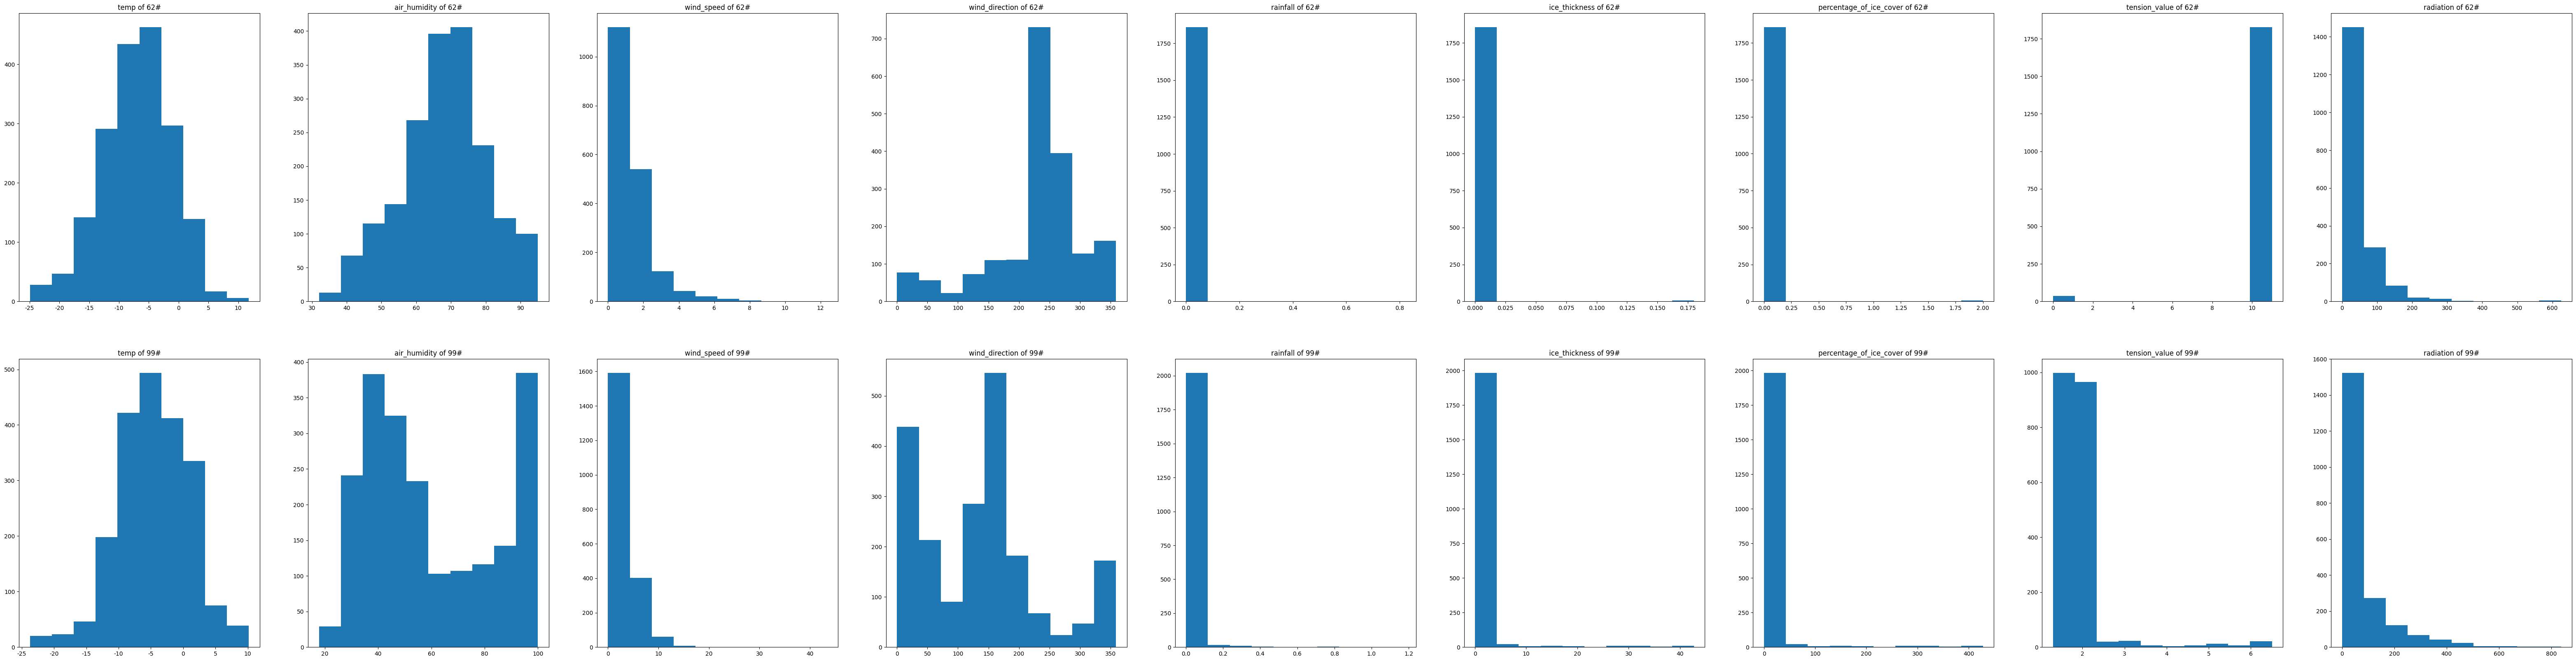

In [717]:
# distribution of features of different monitoring sites
plt.figure(figsize=(80, 20))

col_id = 2
for subplot_id in range(1, 10):
  plt.subplot(2, 9, subplot_id)
  plt.hist(data_62[data_62.columns.tolist()[col_id]])
  plt.title(zh_to_en[data_62.columns.tolist()[col_id]]+" of 62#")
  col_id += 1

col_id = 2
for subplot_id in range(10, 19):
  plt.subplot(2, 9, subplot_id)
  plt.hist(data_99_sort_by_time[data_99_sort_by_time.columns.tolist()[col_id]])
  plt.title(zh_to_en[data_99_sort_by_time.columns.tolist()[col_id]]+" of 99#")
  col_id += 1

## modeling & evaluation
研究问题
1. 分类
  * 通过气象数据分类监测位
  * 通过气象数据预测覆冰告警等级
2. 聚类
  * 聚类天气类型

In [718]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [719]:
# classify monitoring sites (all features)
data_all = pd.concat([data_62, data_99_sort_by_time], axis=0)
x = data_all.iloc[:, 2:11]
y = data_all['所属杆塔']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [720]:
# train lgbm model
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

params = {
    'objective': 'multiclass',
    'num_class': 2,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'feature_fraction': 0.9
}

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.193412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 3142, number of used features: 9
[LightGBM] [Info] Start training from score -0.766423
[LightGBM] [Info] Start training from score -0.624876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [721]:
# prediction & evaluation
y_pred_prob = bst.predict(x_test, num_iteration=bst.best_iteration)
y_pred = [list(x).index(max(x)) for x in y_pred_prob]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       382

    accuracy                           1.00       786
   macro avg       1.00      1.00      1.00       786
weighted avg       1.00      1.00      1.00       786



In [722]:
# train svm model
svm_model = SVC(kernel='rbf', C=1.0)

svm_model.fit(x_train, y_train)

SVC()

In [723]:
# prediction & evaluation
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       404
           1       0.97      1.00      0.99       382

    accuracy                           0.99       786
   macro avg       0.99      0.99      0.99       786
weighted avg       0.99      0.99      0.99       786



In [724]:
# classify monitoring sites (choose features by EDA)
x = data_all.iloc[:, [3, 5, 9]]
y = data_all['所属杆塔']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# train lgbm model
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

params = {
    'objective': 'multiclass',
    'num_class': 2,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'feature_fraction': 0.9
}

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

In [726]:
# prediction & evaluation
y_pred_prob = bst.predict(x_test, num_iteration=bst.best_iteration)
y_pred = [list(x).index(max(x)) for x in y_pred_prob]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       382

    accuracy                           1.00       786
   macro avg       1.00      1.00      1.00       786
weighted avg       1.00      1.00      1.00       786



In [727]:
# train svm model
svm_model = SVC(kernel='rbf', C=1.0)

svm_model.fit(x_train, y_train)

SVC()

In [728]:
# predict & evaluation
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       404
           1       0.97      1.00      0.98       382

    accuracy                           0.98       786
   macro avg       0.98      0.98      0.98       786
weighted avg       0.98      0.98      0.98       786



In [729]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

In [730]:
# classify warning level (all features)
x = data_all.iloc[:, 2:11]
y = data_all['覆冰告警等级']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [731]:
# build DNN and train
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
99/99 [==============================] - 1s 4ms/step - loss: 0.8943 - accuracy: 0.8135 - val_loss: 0.3441 - val_accuracy: 0.9059
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9255 - val_loss: 0.2201 - val_accuracy: 0.9097
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.9440 - val_loss: 0.1620 - val_accuracy: 0.9440
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.9634 - val_loss: 0.1132 - val_accuracy: 0.9656
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9736 - val_loss: 0.0865 - val_accuracy: 0.9707
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9822 - val_loss: 0.0683 - val_accuracy: 0.9758
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0538 - val_accuracy: 0.9809
Epoch 8/50
99/99 [==

In [732]:
# prediction & evaluation
y_pred_prob = model.predict(x_test)
y_pred = [tf.argmax(x).numpy() for x in y_pred_prob]
print(classification_report(y_test, y_pred))

25/25 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       706
           2       1.00      0.98      0.99        56
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00       786
   macro avg       1.00      1.00      1.00       786
weighted avg       1.00      1.00      1.00       786



In [733]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [734]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       706
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00       786
   macro avg       1.00      1.00      1.00       786
weighted avg       1.00      1.00      1.00       786



In [747]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [748]:
# cluster data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_all.iloc[:, 2:11])

# sunny cloudy rainy
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [754]:
labels = kmeans.labels_

np.set_printoptions(threshold=np.inf)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [750]:
silhouette_avg = silhouette_score(data_scaled, labels) # -1 ~ 1; the closer to 1, the better
print(silhouette_avg)
calinski_harabasz_score_value = calinski_harabasz_score(data_scaled, labels)
print(calinski_harabasz_score_value)
davies_bouldin_score_value = davies_bouldin_score(data_scaled, labels)
print(davies_bouldin_score_value)

0.2747482239500282
1177.2740587984551
1.1909673990978027


In [753]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_scaled)

np.set_printoptions(threshold=np.inf)
print(agg_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [752]:
silhouette_avg = silhouette_score(data_scaled, agg_labels) # -1 ~ 1; the closer to 1, the better
print(silhouette_avg)
calinski_harabasz_score_value = calinski_harabasz_score(data_scaled, agg_labels) # the bigger, the better
print(calinski_harabasz_score_value)
davies_bouldin_score_value = davies_bouldin_score(data_scaled, agg_labels) # the smaller, the better
print(davies_bouldin_score_value)

0.2675286000392134
1103.971276552673
1.1639099327461782


In [756]:
def unify_label(x):
  if x == 1:
    return 2
  elif x == 2:
    return 1
  else:
    return 0

for i in range(0, len(labels)):
  labels[i] = unify_label(labels[i])

In [757]:
print(labels != agg_labels)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa